In [2]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
#Loading the dataset
diabetes_data=pd.read_csv('diabetes.csv')

#print first 5 rows of dataframe
diabetes_data.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
108,3,83,58,31,18,34.3,0.336,25,0
28,13,145,82,19,110,22.2,0.245,57,0
619,0,119,0,0,0,32.4,0.141,24,1
460,9,120,72,22,56,20.8,0.733,48,0
633,1,128,82,17,183,27.5,0.115,22,0
304,3,150,76,0,0,21.0,0.207,37,0
721,1,114,66,36,200,38.1,0.289,21,0


### Basic EDA and statistical Analysis

In [6]:
#gives information about datatypes
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#basic statistic details about dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Can minimum value of below listed columns be zero?

#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [9]:
diabetes_data_copy=diabetes_data.copy()

#replacing the 0 values with Nan
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


#showing the count of nan
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### To fill these Nan values the data distribution needs to be understood

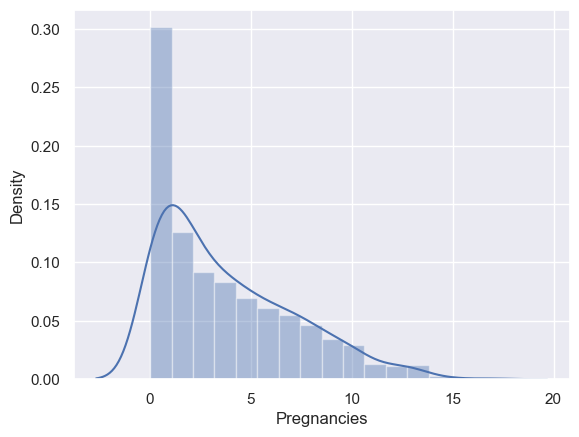

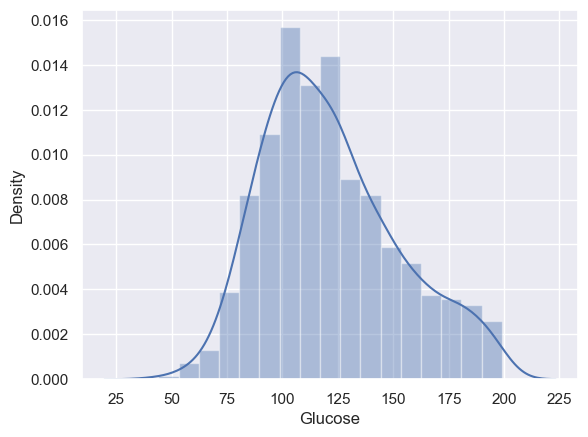

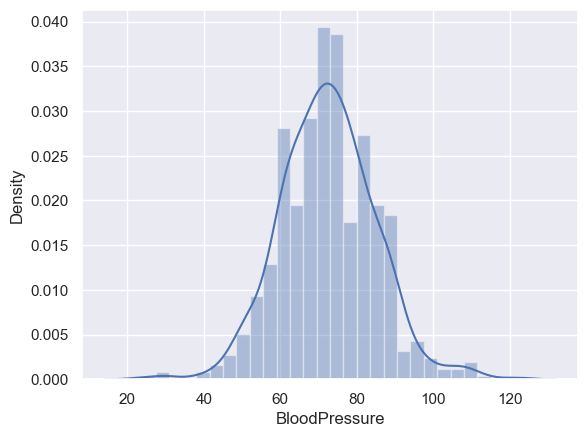

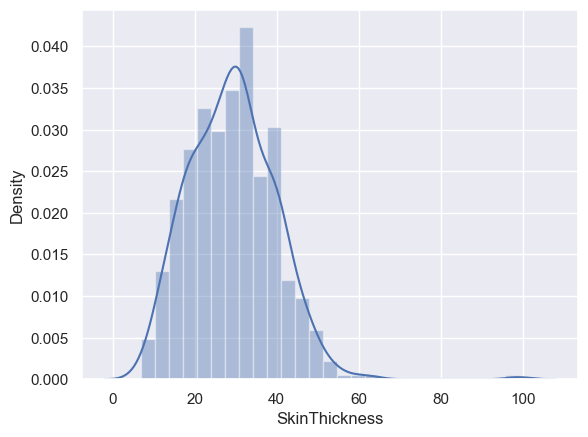

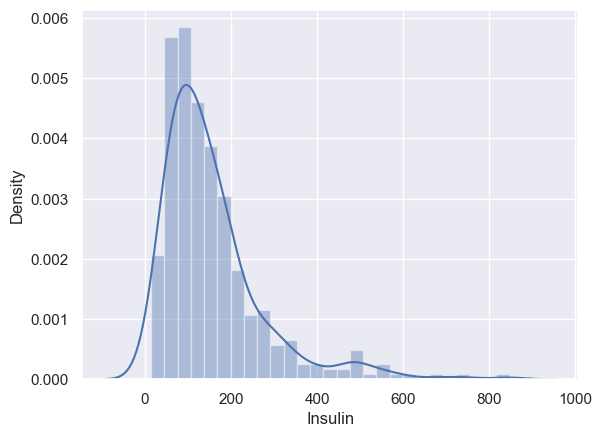

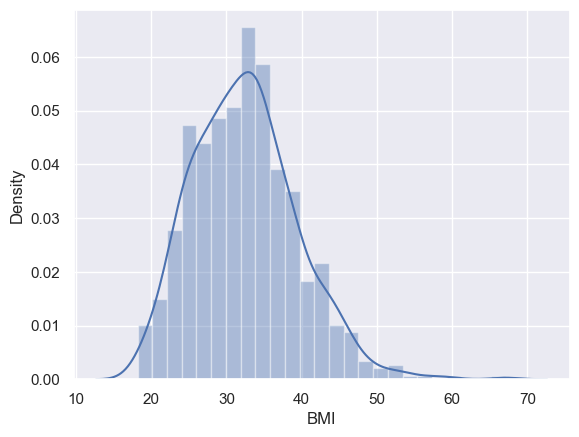

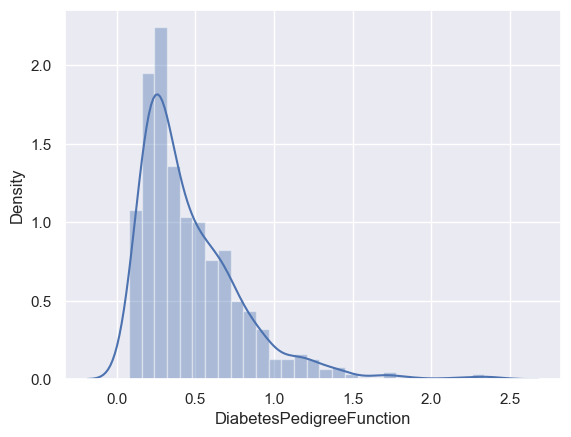

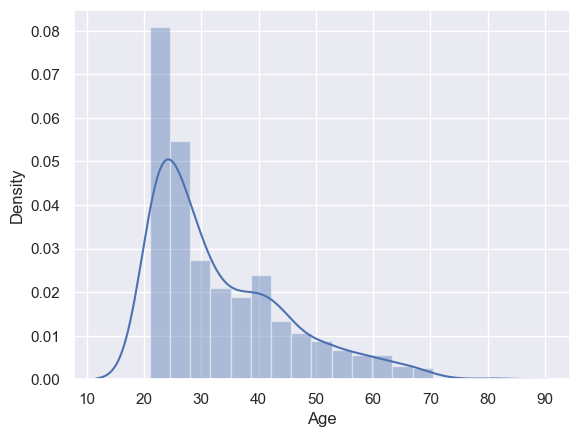

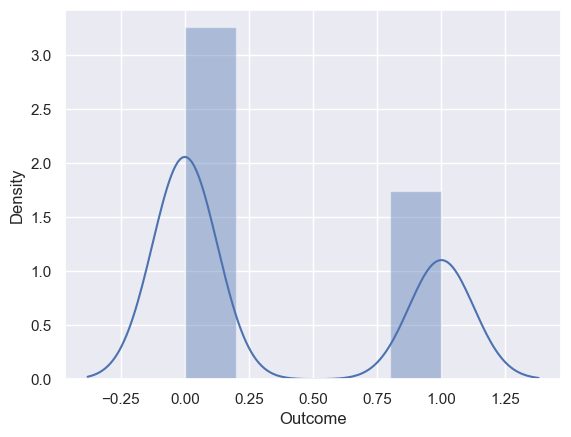

In [11]:
for column in diabetes_data_copy.columns:
    plt.figure()
    sns.distplot(diabetes_data_copy[column])

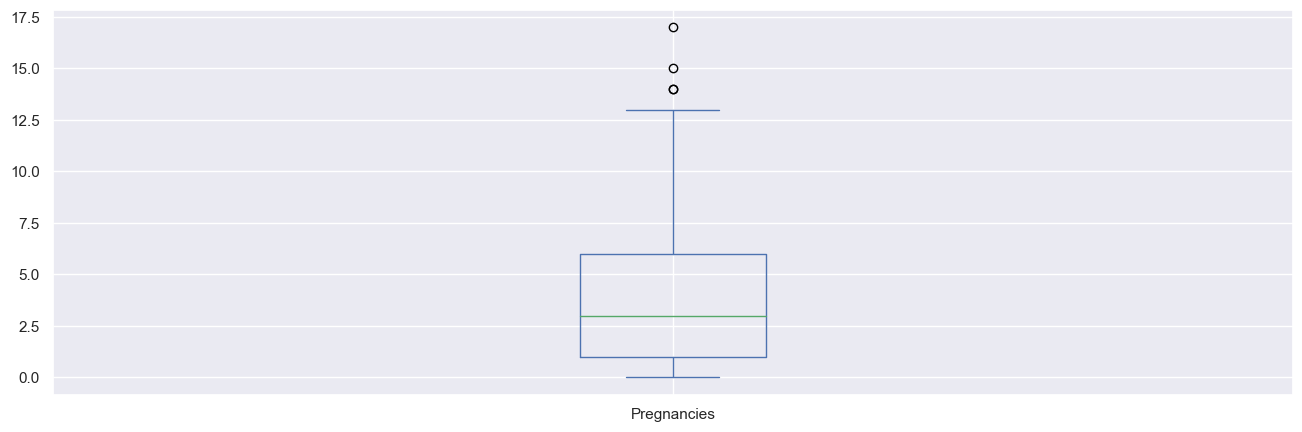

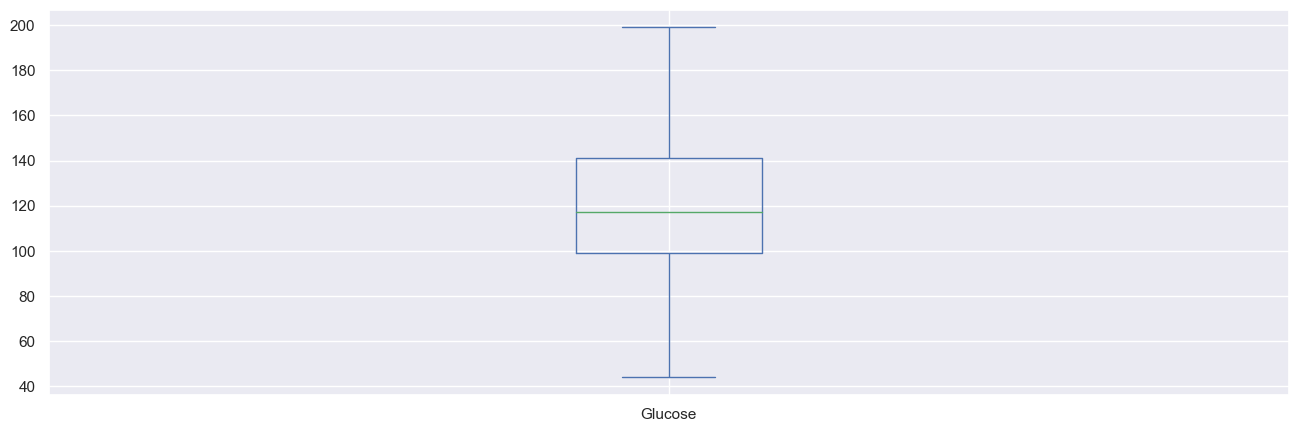

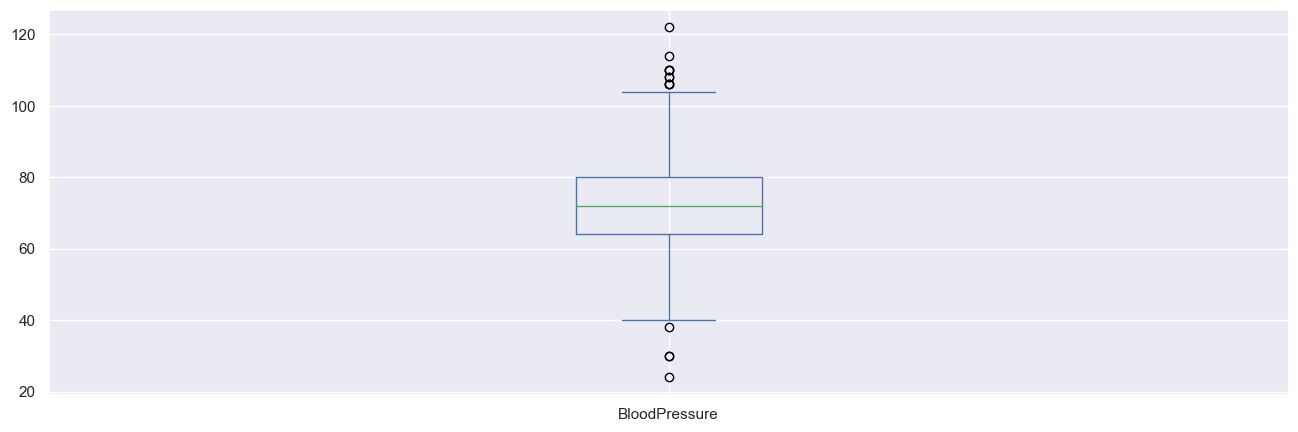

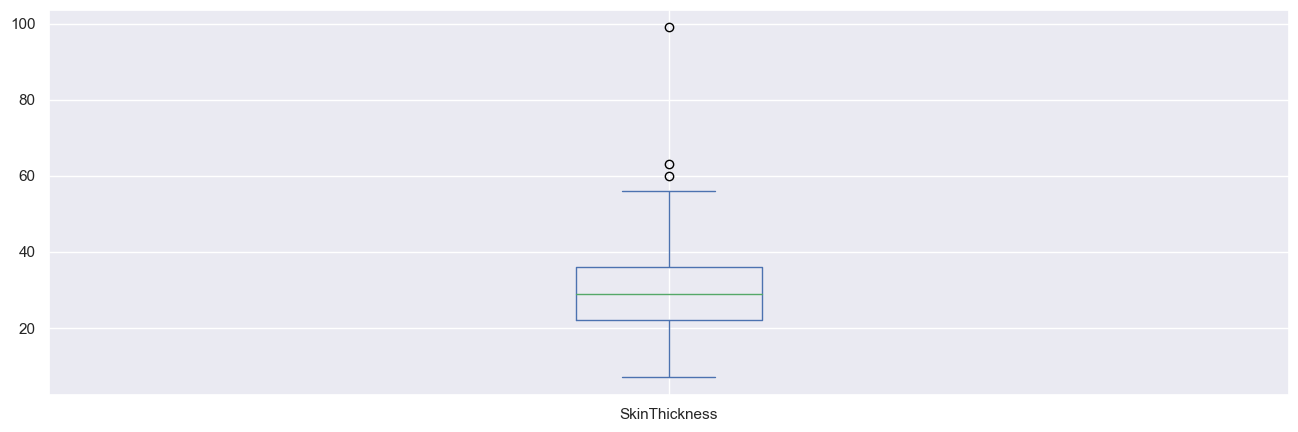

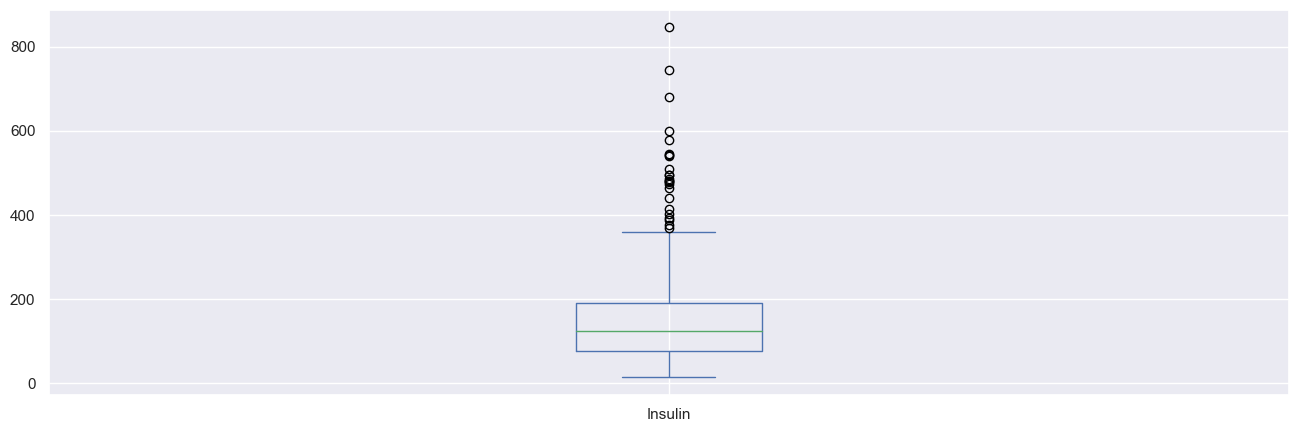

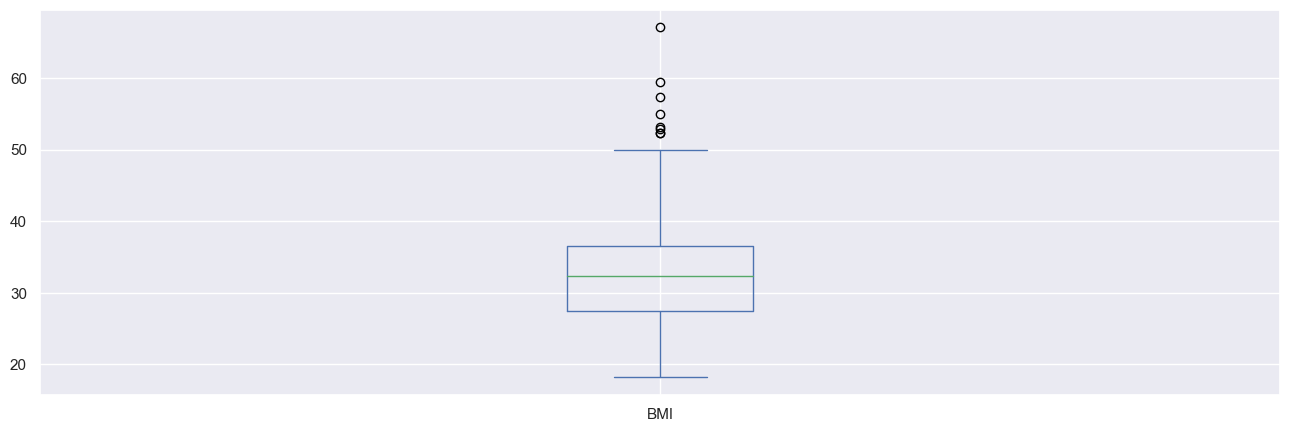

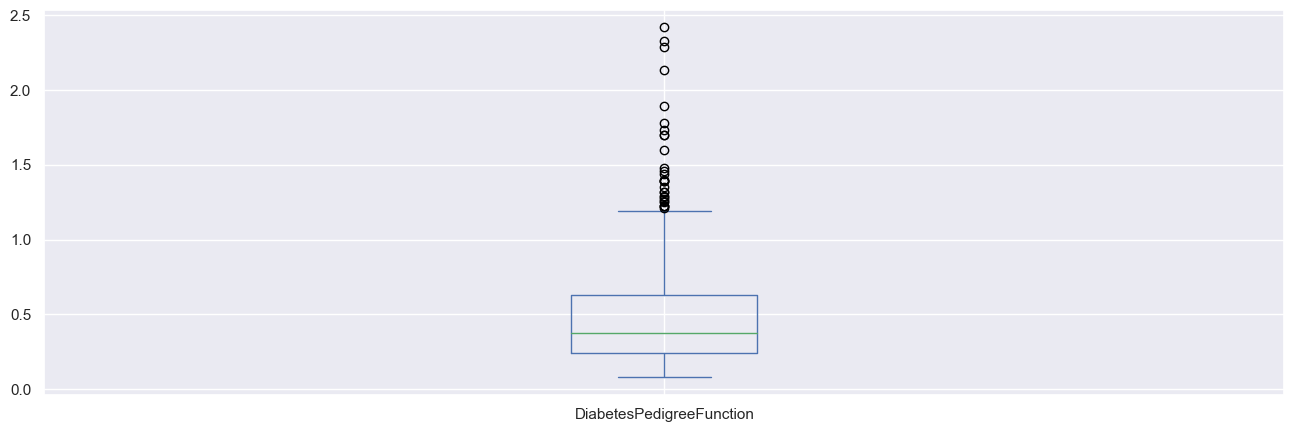

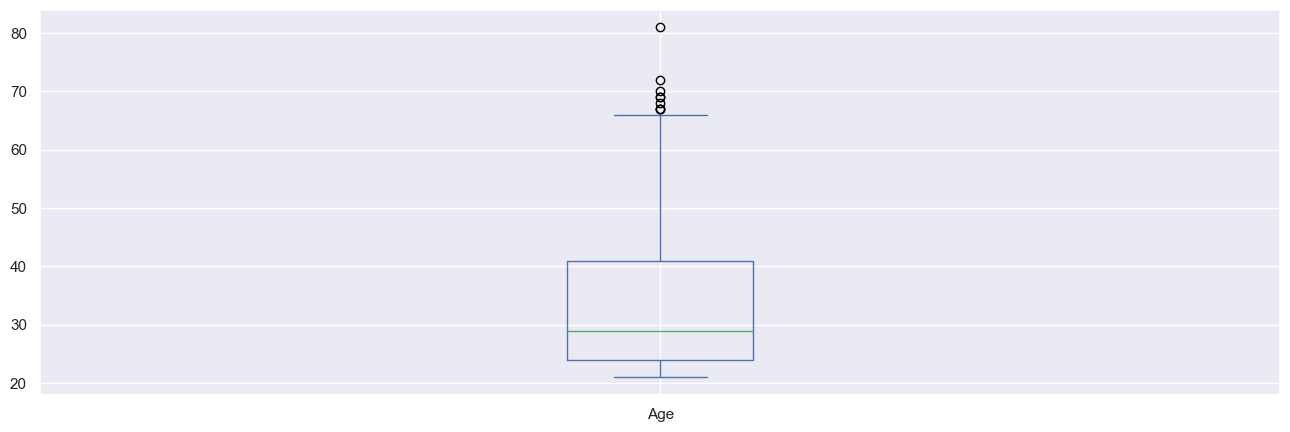

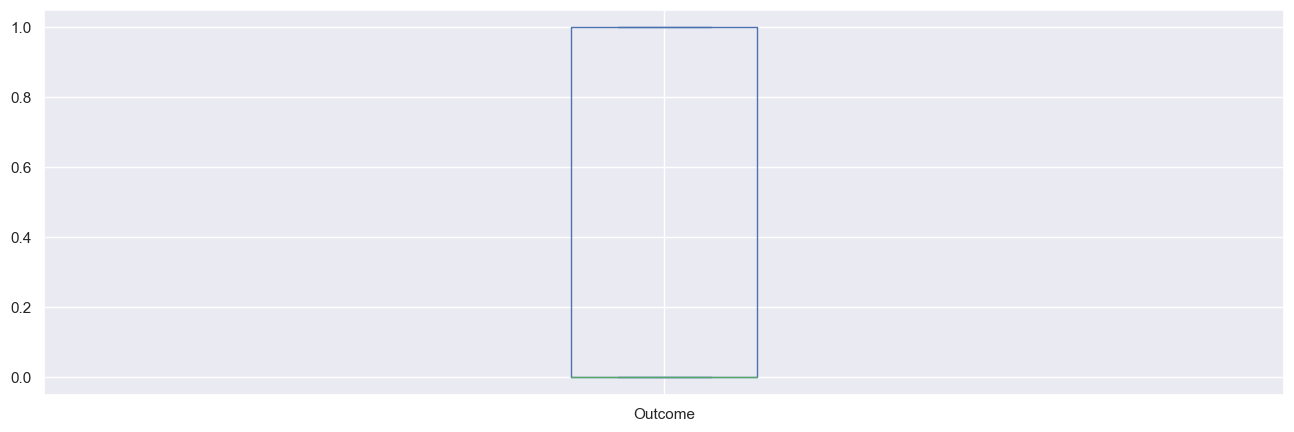

In [13]:
for column in diabetes_data_copy.columns:
    plt.figure()
    diabetes_data_copy[column].plot.box(figsize=(16,5))

### Aiming to impute nan values for the columns in accordance with their distribution

In [14]:
diabetes_data_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
#Glucose & BloodPressure are almost normally distributed so we can replace with mean

diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(),inplace=True)

diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(),inplace=True)

#since skin thickness, Insulin and BMI are highly positively skewed, imputing it with mean will be a wrong choice so we will replace with median

diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(),inplace=True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(),inplace=True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(),inplace=True)

diabetes_data_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

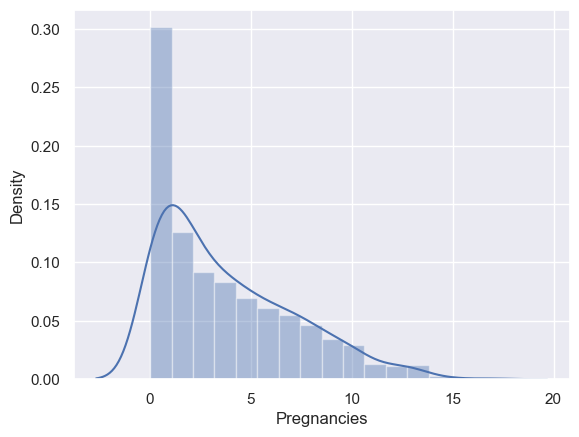

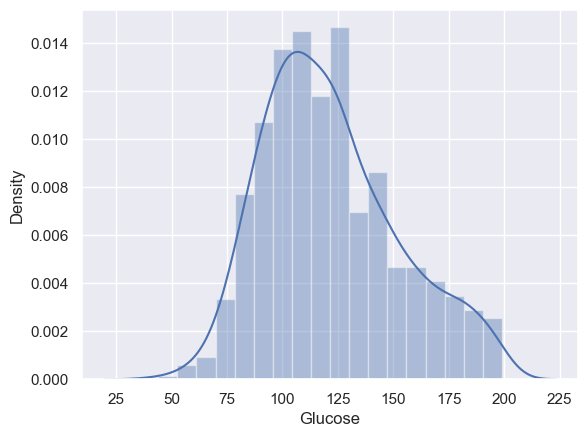

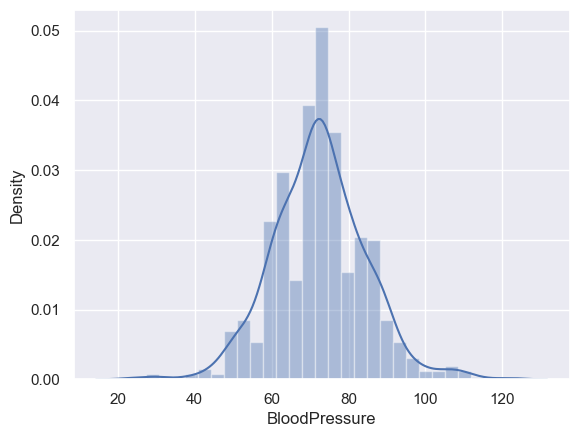

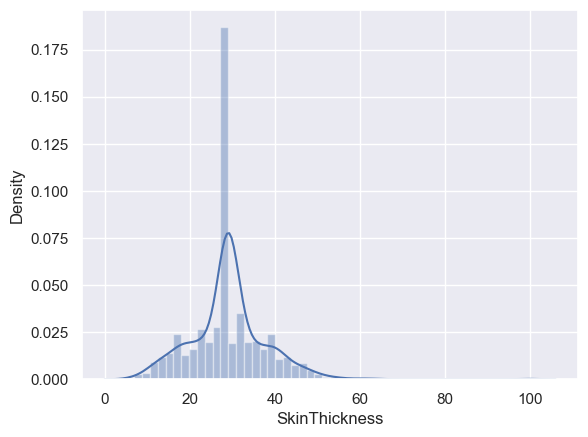

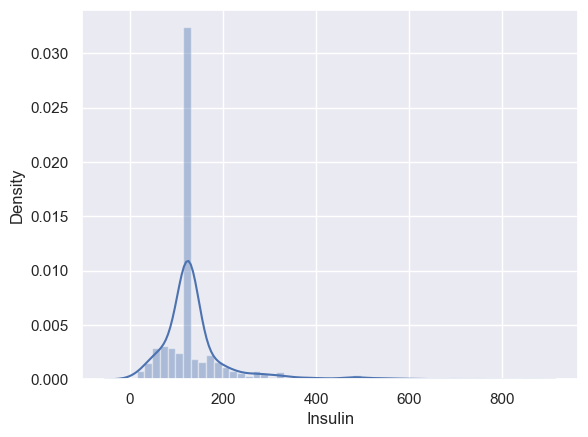

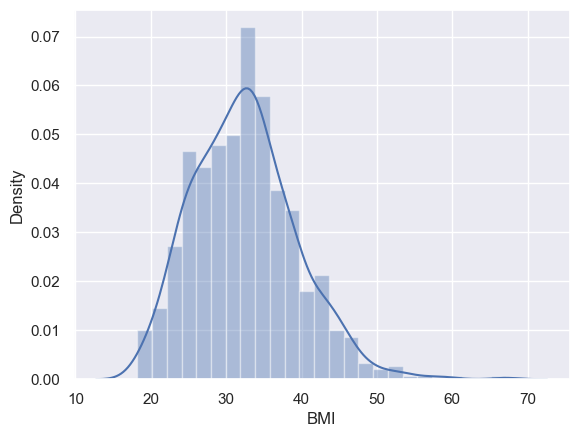

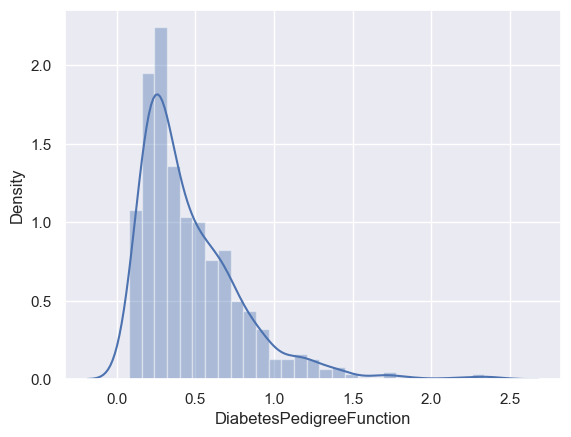

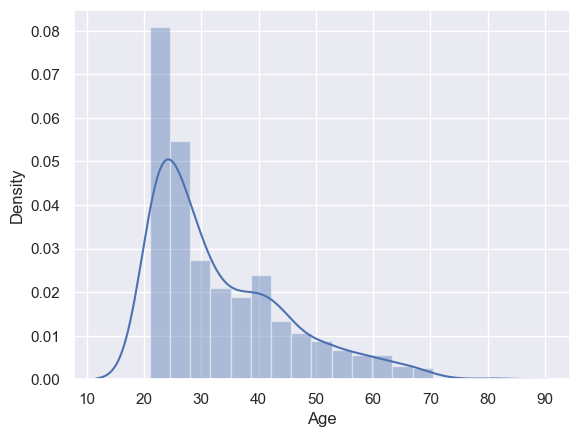

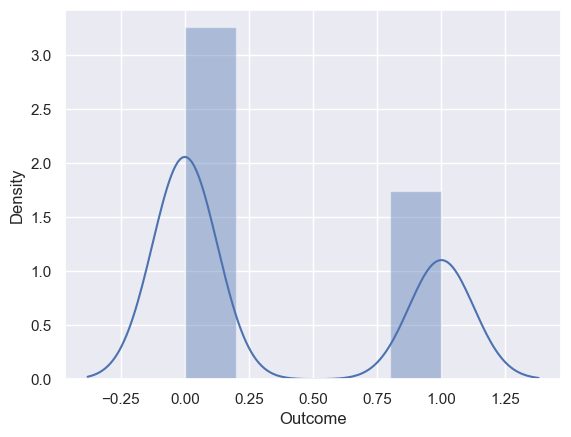

In [17]:
#checking distribution after imputing Nan with mean and median

for column in diabetes_data_copy.columns:
    plt.figure()
    sns.distplot(diabetes_data_copy[column])

In [18]:
#observing shape of data
diabetes_data.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64


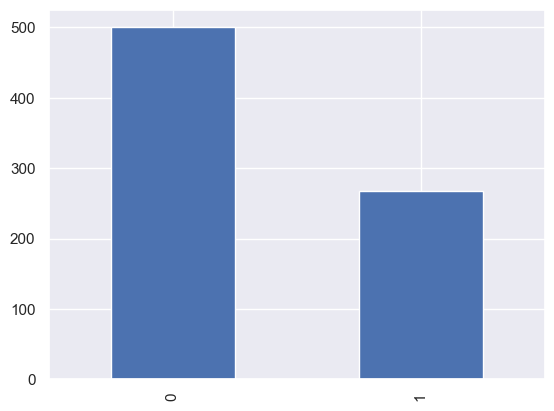

In [20]:
#Checking balance of data by counting the number of outcome 
diabetes_data.Outcome.value_counts().plot(kind="bar")
print(diabetes_data.Outcome.value_counts())
plt.show()

#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients


#### Hence we can say that data is imbalanced here

### Pair Plot w.r.t Outcome

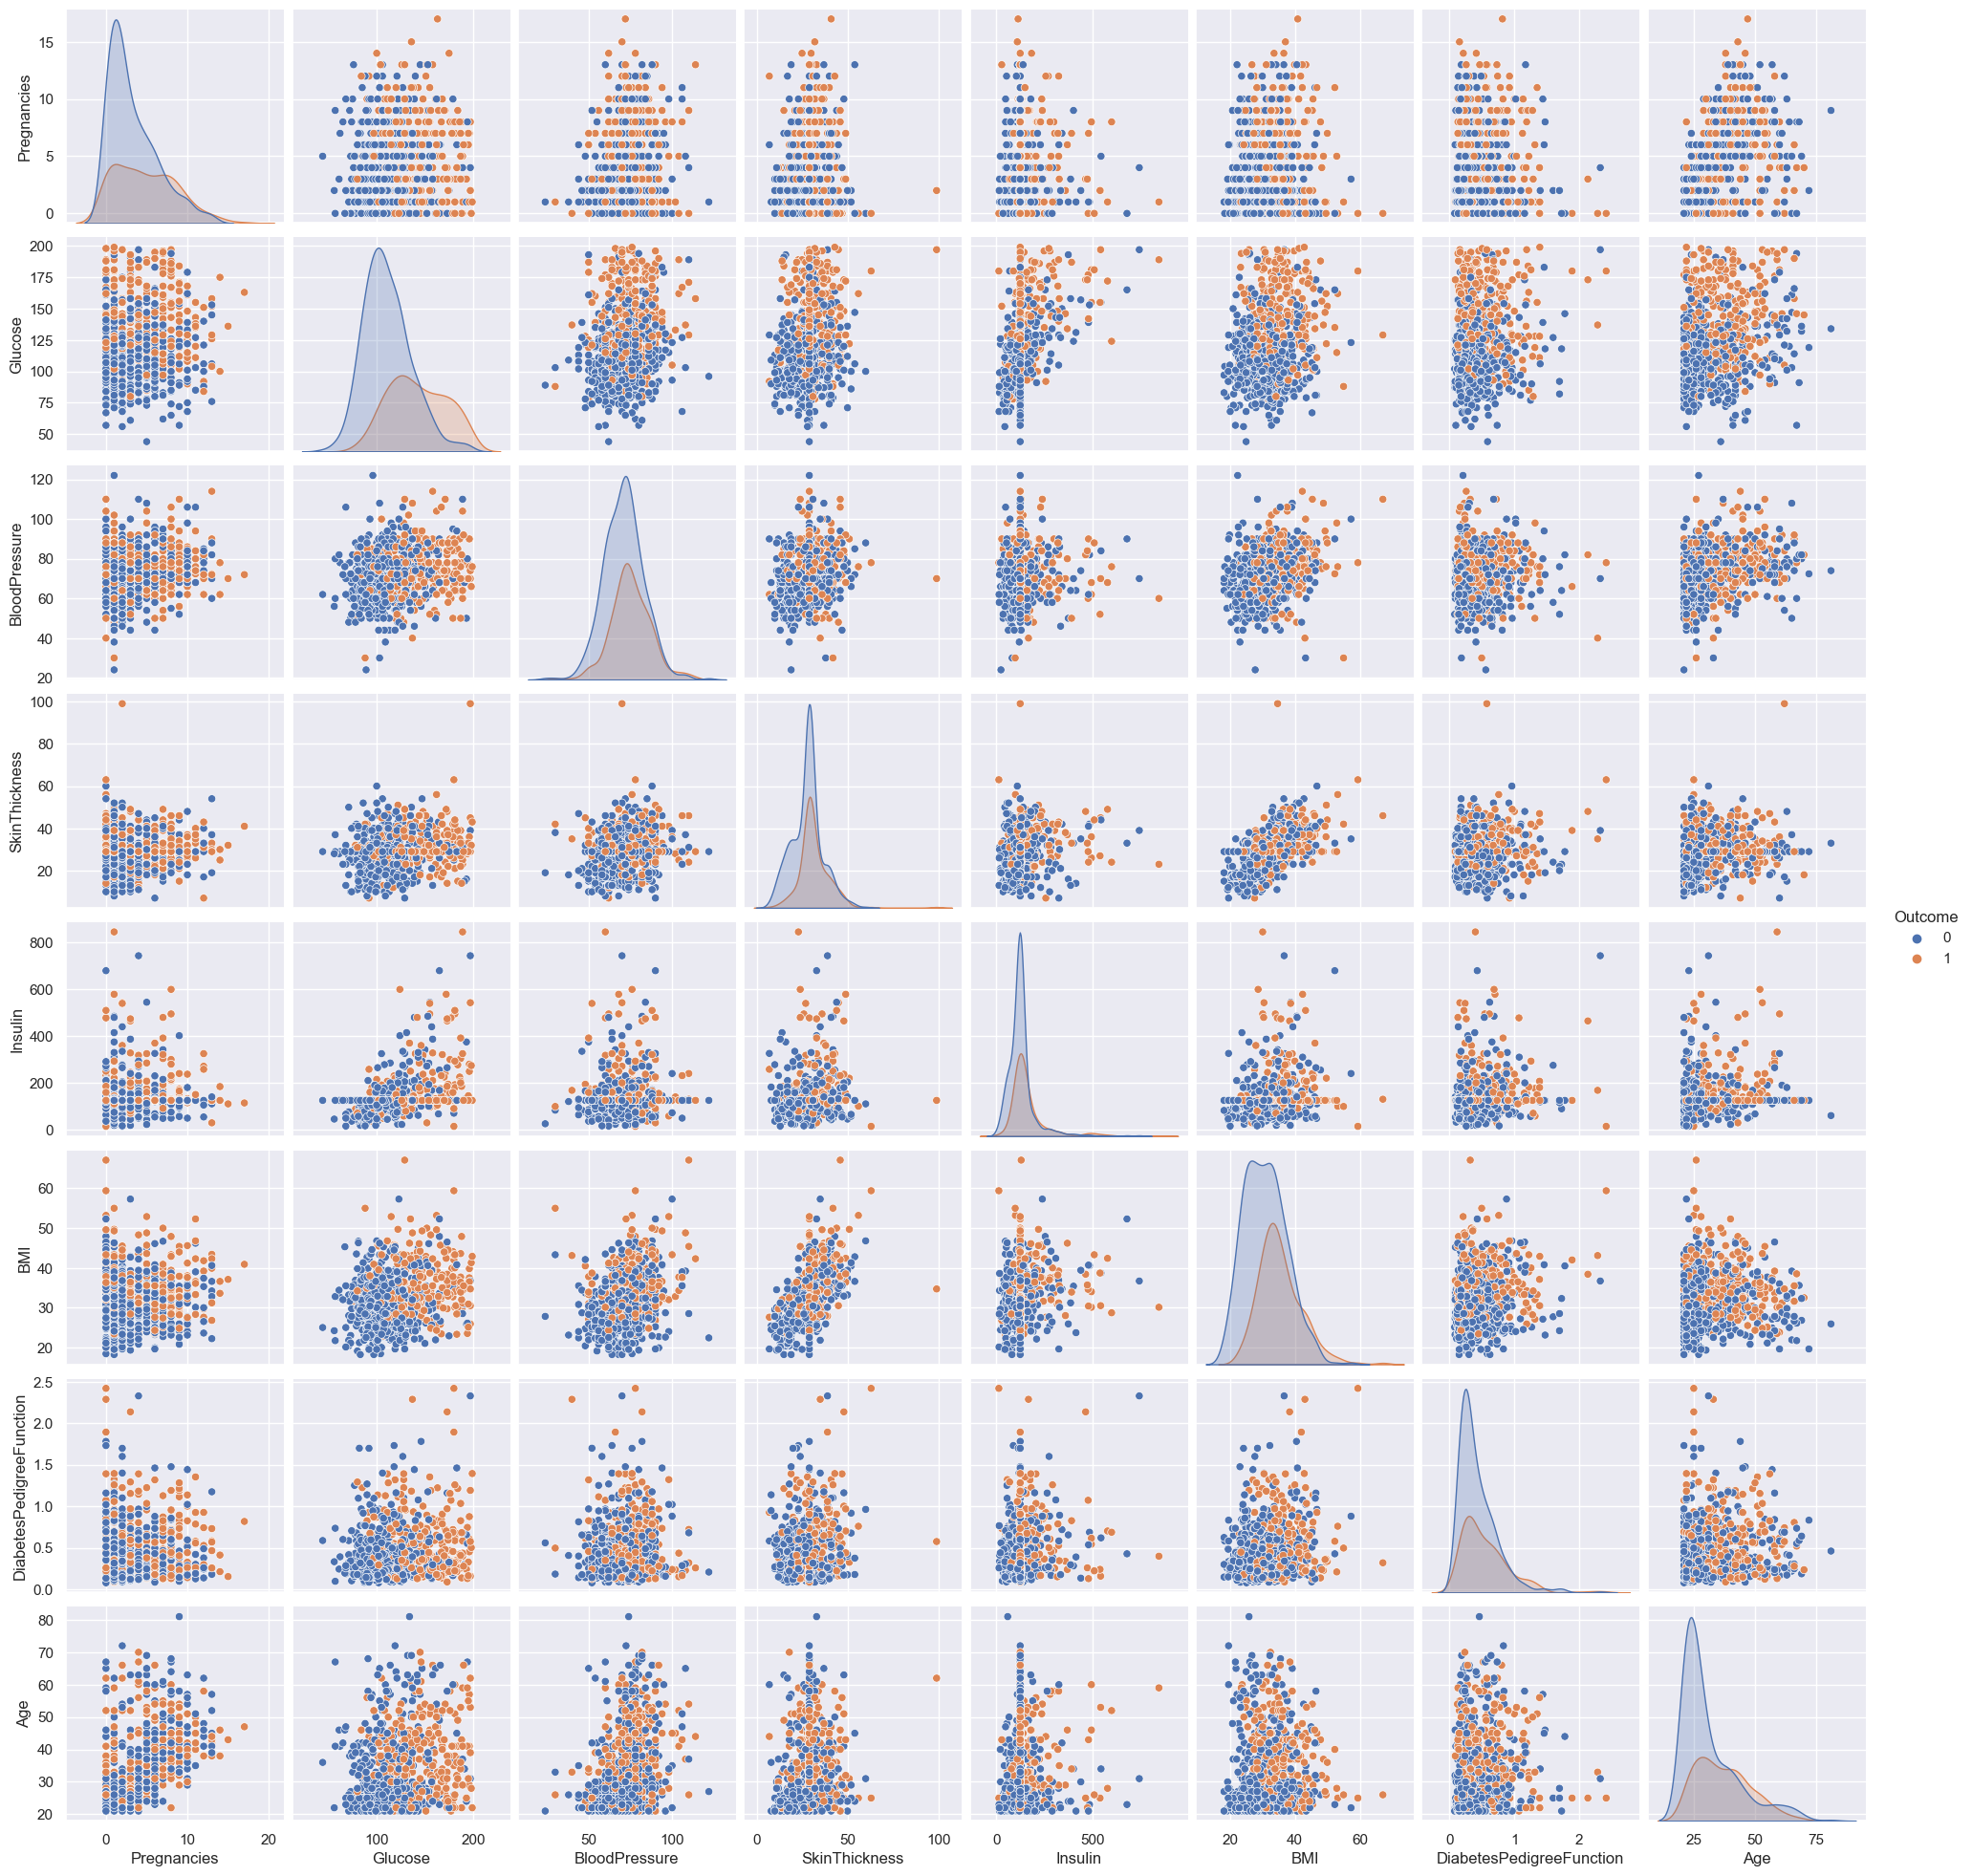

In [22]:

p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

### Heatmap for data

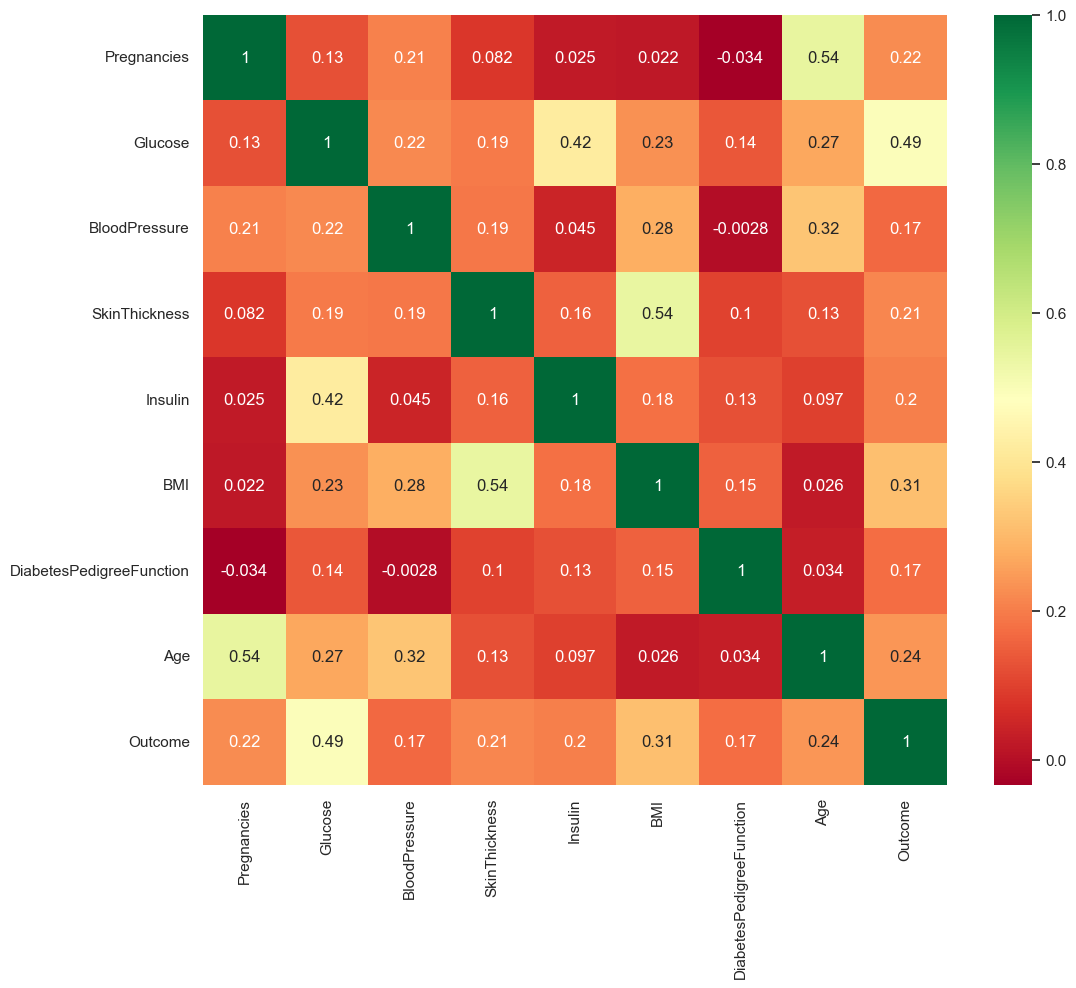

In [23]:
plt.figure(figsize=(12,10))
#using seaborn to plot heatmap
p=sns.heatmap(diabetes_data_copy.corr(),annot=True,cmap ='RdYlGn')

#### Since our dataset has values in range of 0 to 100 it is better to scale them

In [24]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X= pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis=1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [25]:
#looking for transformed data of our predictors
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [27]:
diabetes_data_copy.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [26]:
#assigning label column
y=diabetes_data_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Defining training and test data

In [28]:
#importing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)
#stratify = y will maintain same ratio in case of class imbalance

In [29]:
from sklearn.neighbors import KNeighborsClassifier

test_scores=[]
train_scores=[]

for i in range(1,25):
    
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [30]:
print("Training scores are : ",train_scores)
print("\n ")
print("Test scores are : ",test_scores)

Training scores are :  [1.0, 0.84375, 0.8671875, 0.8359375, 0.828125, 0.8046875, 0.814453125, 0.802734375, 0.798828125, 0.802734375, 0.798828125, 0.79296875, 0.794921875, 0.796875, 0.810546875, 0.80859375, 0.80078125, 0.796875, 0.810546875, 0.80859375, 0.810546875, 0.796875, 0.7890625, 0.787109375]

 
Test scores are :  [0.73046875, 0.73046875, 0.74609375, 0.7421875, 0.7421875, 0.72265625, 0.74609375, 0.74609375, 0.74609375, 0.73046875, 0.765625, 0.734375, 0.75, 0.734375, 0.73828125, 0.73046875, 0.75390625, 0.73828125, 0.74609375, 0.74609375, 0.75, 0.74609375, 0.76171875, 0.75390625]


In [31]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely

max_test_score=max(test_scores)
test_scores_ind=[i for i,v in enumerate(test_scores) if v==  max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


### The best result is captured at k = 11 hence 11 is used for the final model

In [33]:
#Setup a knn classifier with k neighbors
knn=KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

### Model Performance Analysis

In [34]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above. Creating the confusion Matrix
y_pred=knn.predict(X_test)

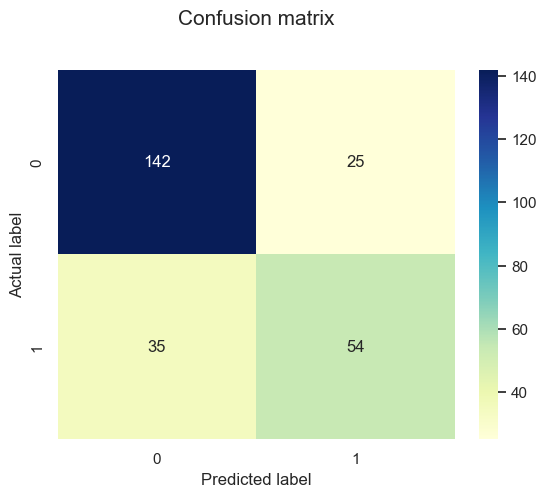

In [35]:
#Creating a HeatMap for Confusion_Matrix
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix',y=1.1,fontsize=15)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
#import Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



### Hyper Parameter Tuning

In [37]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
for i in range(2,50):
    param_grid = {'n_neighbors':np.arange(1,50)}
    knn = KNeighborsClassifier()
    knn_cv= GridSearchCV(knn,param_grid,cv=i)
    knn_cv.fit(X,y)
    print("For cv : {}".format(i))
    print("Best Score:" + str(knn_cv.best_score_))
    print("Best Parameters: " + str(knn_cv.best_params_))

For cv : 2
Best Score:0.76171875
Best Parameters: {'n_neighbors': 15}
For cv : 3
Best Score:0.76953125
Best Parameters: {'n_neighbors': 24}
For cv : 4
Best Score:0.7721354166666666
Best Parameters: {'n_neighbors': 21}
For cv : 5
Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
For cv : 6
Best Score:0.7760416666666666
Best Parameters: {'n_neighbors': 25}
For cv : 7
Best Score:0.7748361730013107
Best Parameters: {'n_neighbors': 27}
For cv : 8
Best Score:0.77734375
Best Parameters: {'n_neighbors': 17}
For cv : 9
Best Score:0.7772913816689466
Best Parameters: {'n_neighbors': 15}
For cv : 10
Best Score:0.7735133287764867
Best Parameters: {'n_neighbors': 36}
For cv : 11
Best Score:0.7761151891586674
Best Parameters: {'n_neighbors': 15}
For cv : 12
Best Score:0.7747395833333334
Best Parameters: {'n_neighbors': 15}
For cv : 13
Best Score:0.7735332464146024
Best Parameters: {'n_neighbors': 27}
For cv : 14
Best Score:0.7761423761423761
Best Parameters: {'n_neighbors': 15}
For c

#### By looking at the above results we can see that best score that we can get by cross validation in KNN is 0.78117 for nearest neighbors = 15 for cv=15.

In [38]:
''' train, test, evaluation function '''

def result(X, y, ts, rs, model):
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    
    ''' train test split '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    ''' scaling '''
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    ''' fit on data '''
    model.fit(X_train, y_train)
    
    ''' prediction '''
    pred = model.predict(X_test)
    
    ''' performance of model '''
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()
    
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [39]:
''' defining independent(predictor) and dependent(target) feature '''
# scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = diabetes_data_copy[['Outcome']]

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       123
           1       0.54      0.62      0.58        69

    accuracy                           0.68       192
   macro avg       0.66      0.67      0.66       192
weighted avg       0.69      0.68      0.68       192

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6770833333333334
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


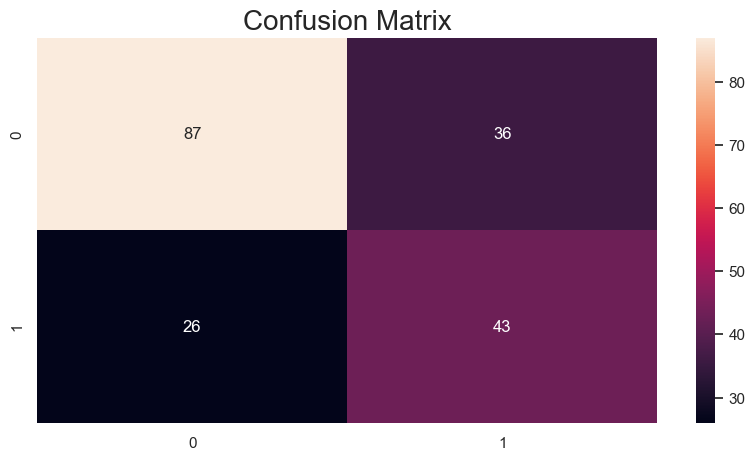

In [40]:
"""Decision Tree Classifier"""
from sklearn. tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
result(X,y,0.25,42,dt)